In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import stats
import scipy

In [2]:
df = pd.read_csv("VR_Participants - Co-Presence.csv", delimiter=",")

In [3]:
df = df.dropna()

In [4]:
questions = range(1,19)

for c in questions:
    df[str(c)] = df[str(c)].apply(lambda x: x + 4)

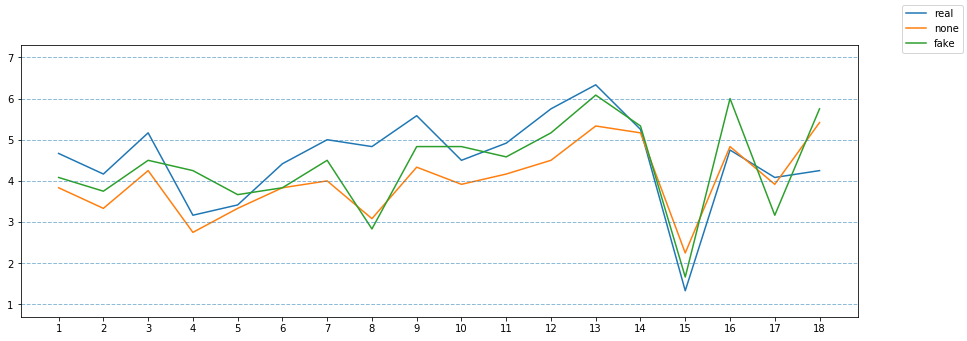

In [5]:
fig, ax = plt.subplots(1,figsize = (15,5))
for y,c in enumerate(df.condition.unique()):
    df_temp = df[(df.condition == c)]
    tmp = []
    for i,q in enumerate(questions):
        #print(df_temp[str(q)].mean())
        tmp.append(df_temp[str(q)].mean())
    ax.plot(questions,tmp, label=c)
fig.legend()
plt.xticks(questions)

for i in range(1,8):
    ax.axhline(y=i, xmin=0, xmax=21, linestyle = "--", alpha = 0.5,linewidth = 1)

plt.savefig("co-presence.svg", bbox_inches="tight")
plt.show()